In [1]:
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks/instquality/")

import os
os.chdir("/content/drive/MyDrive/Colab Notebooks/instquality/")

In [12]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

from functions.utils import revert_to_raw, prep_target

df = pd.read_pickle("files/inst.dat")
df = df.replace("")
# df = prep_target(df)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Institutional quality variables
- plot 4 IQ vars x 4 countries over time - 1 IQ var x 4 conutries, for 4 IQ vars

In [11]:
prefixes = ["efw", "fiw", "ief", "p5d", "pts", "wgi", "wb", "tgt"]
col_counts = {p: sum(c.startswith(p + "_") for c in df.columns)
              for p in prefixes}

print("Number of variables per source:")
print(pd.Series(col_counts).astype(int).to_string())

Number of variables per source:
efw    79
fiw    15
ief    13
p5d    17
pts     6
wgi    36
wb     48
tgt     1


In [15]:
prefix = 'wgi'
cols = [c for c in df.columns if c.startswith(f"{prefix}_")]
print(f"Found {len(cols)} {prefix} columns:")
print("\n".join(cols))

Found 36 wgi columns:
wgi_voiceandaccountability_estimate
wgi_voiceandaccountability_lower
wgi_voiceandaccountability_numsrc
wgi_voiceandaccountability_rank
wgi_voiceandaccountability_stderr
wgi_voiceandaccountability_upper
wgi_political_stabilitynoviolence_estimate
wgi_political_stabilitynoviolence_lower
wgi_political_stabilitynoviolence_numsrc
wgi_political_stabilitynoviolence_rank
wgi_political_stabilitynoviolence_stderr
wgi_political_stabilitynoviolence_upper
wgi_governmenteffectiveness_estimate
wgi_governmenteffectiveness_lower
wgi_governmenteffectiveness_numsrc
wgi_governmenteffectiveness_rank
wgi_governmenteffectiveness_stderr
wgi_governmenteffectiveness_upper
wgi_regulatoryquality_estimate
wgi_regulatoryquality_lower
wgi_regulatoryquality_numsrc
wgi_regulatoryquality_rank
wgi_regulatoryquality_stderr
wgi_regulatoryquality_upper
wgi_ruleoflaw_estimate
wgi_ruleoflaw_lower
wgi_ruleoflaw_numsrc
wgi_ruleoflaw_rank
wgi_ruleoflaw_stderr
wgi_ruleoflaw_upper
wgi_controlofcorruption_esti

In [8]:
p5d_labels = {
    "p5d_flag": "Polity Code Flag (0 = normal, 1–2 = special polity, 3 = transition)",
    "p5d_fragment": "State Fragmentation Code (0–3, higher = more territorial fragmentation)",
    "p5d_democ": "Democracy Score (0–10)",
    "p5d_autoc": "Autocracy Score (0–10)",
    "p5d_polity": "Polity Score (Democracy – Autocracy, range −10 to +10)",
    "p5d_polity2": "Polity2 Score (Revised Polity, −10 to +10, interpolated)",
    "p5d_durable": "Regime Durability (years since last regime change)",
    "p5d_xrreg": "XRREG: Regulation of Chief Executive Recruitment (0–3)",
    "p5d_xrcomp": "XRCOMP: Competitiveness of Executive Recruitment (0–3)",
    "p5d_xropen": "XROPEN: Openness of Executive Recruitment (0–4)",
    "p5d_xconst": "XCONST: Constraints on Chief Executive (1–7, higher = more constrained)",
    "p5d_parreg": "PARREG: Regulation of Political Participation (1–5)",
    "p5d_parcomp": "PARCOMP: Competitiveness of Political Participation (0–5)",
    "p5d_exrec": "EXREC: Executive Recruitment Component (0–8)",
    "p5d_exconst": "EXCONST: Executive Constraints Component (1–7)",
    "p5d_polcomp": "POLCOMP: Political Competition Component (1–10)",
    "p5d_regtrans": "Regime Transition Code (−77, −88, 0–99: special transitions or missing)",
}

### Coverage

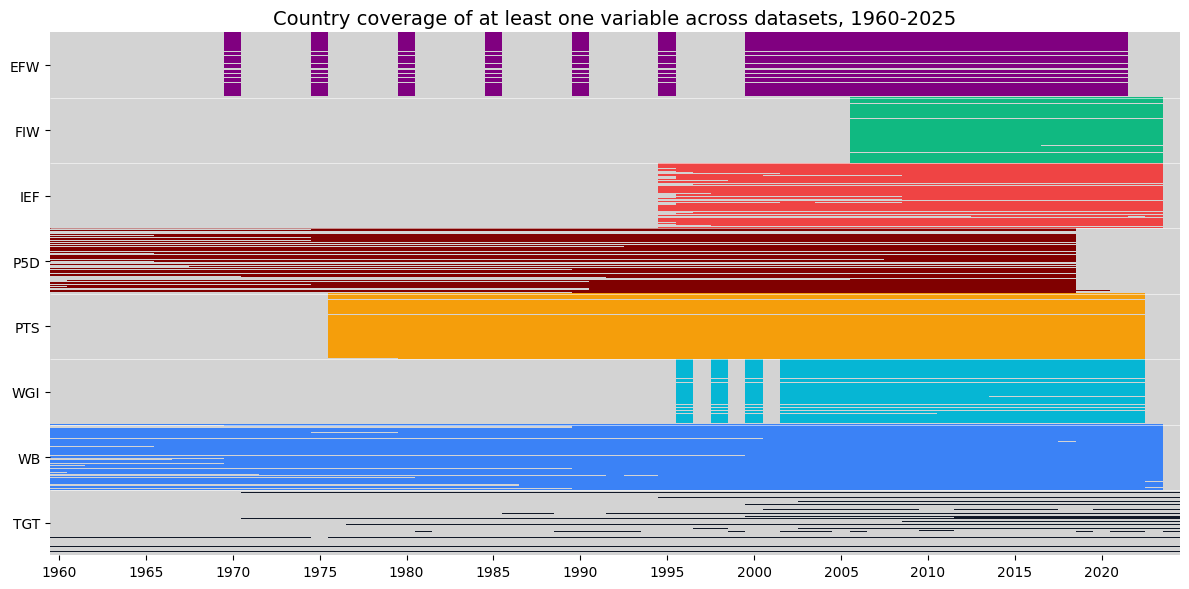

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'Country coverage of at least one variable across datasets, 1960-2025'}>)

In [ ]:
from functions.plot import coverage_panel

prefixes = ["efw", "fiw", "ief", "p5d", "pts", "wgi", "wb", "tgt"]
coverage_panel(df, prefixes, start=1960, end=2024, missing_color='lightgrey')

# we can see target data is the bottleneck
# IQ data sources don't have that length tho

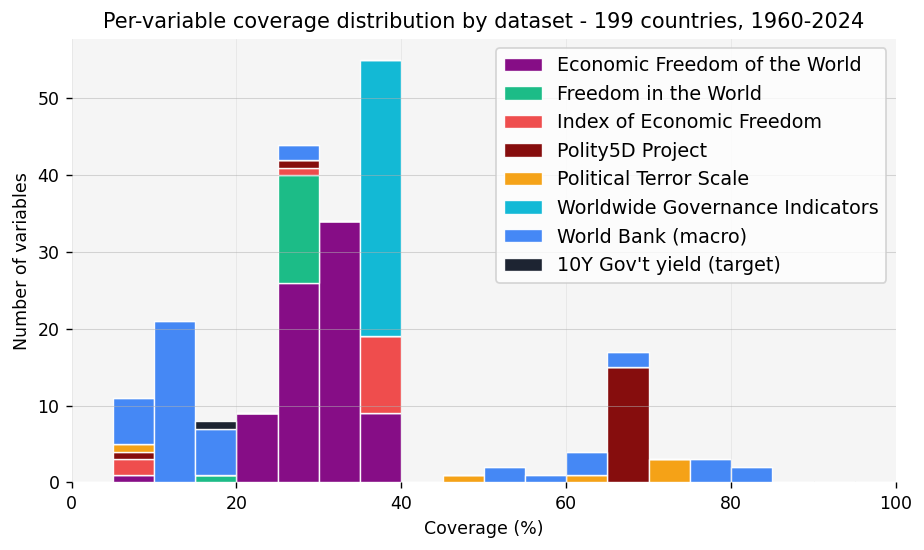

In [ ]:
from functions.plot import coverage_per_variable

coverage_per_variable(df)

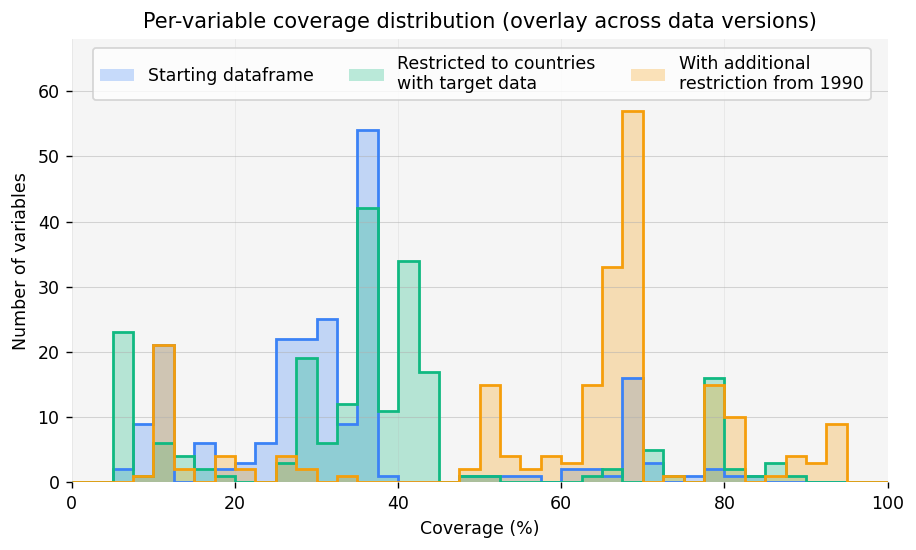

In [ ]:
from functions.plot import coverage_per_version

coverage_per_version(df)

### Timeseries

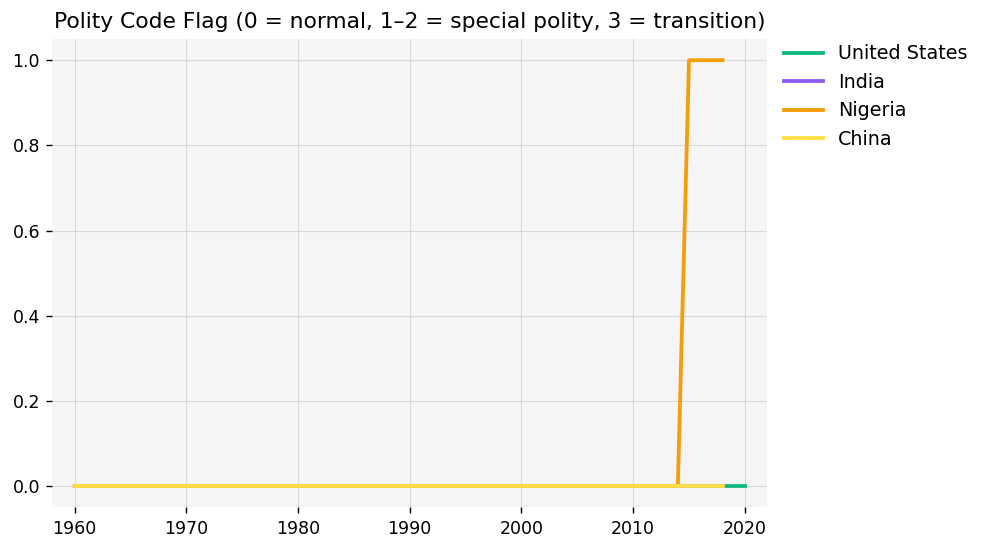

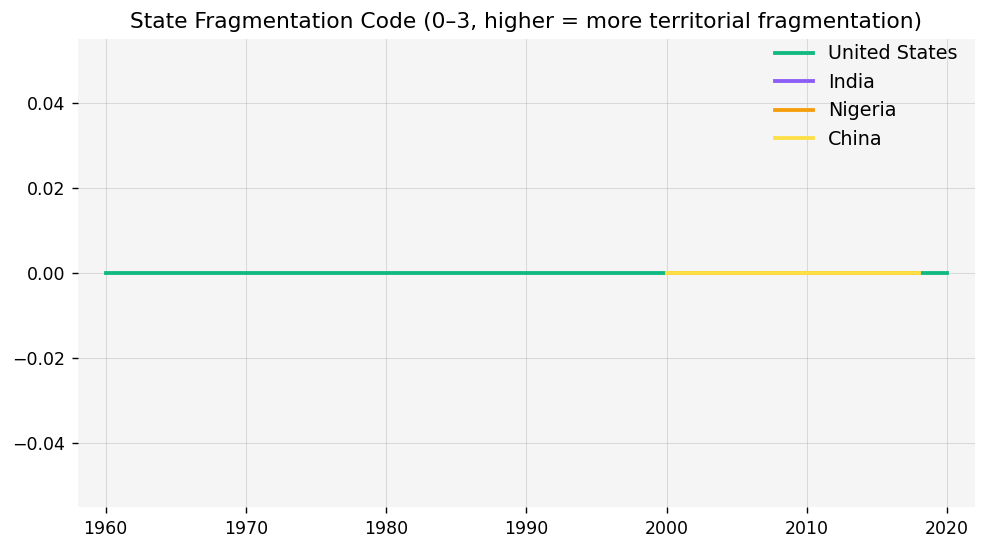

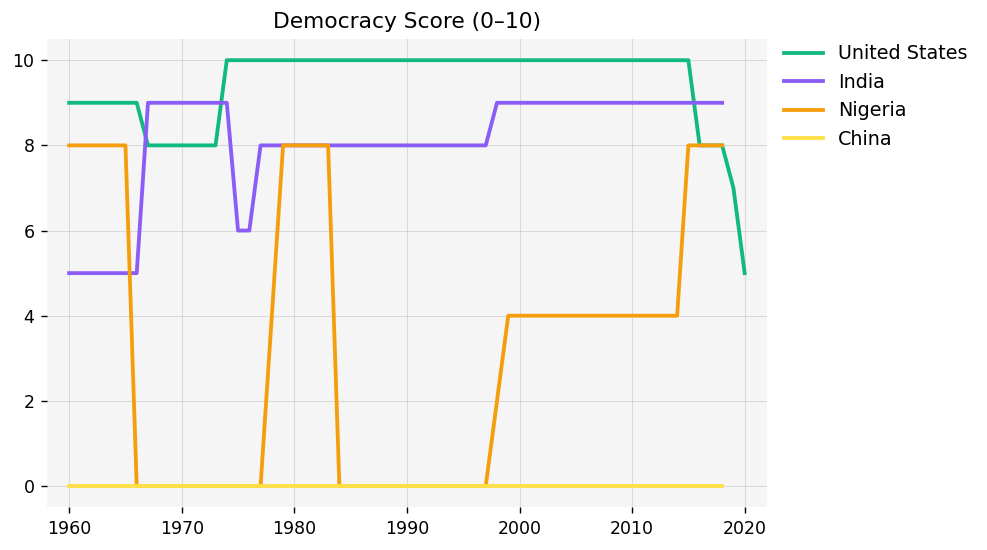

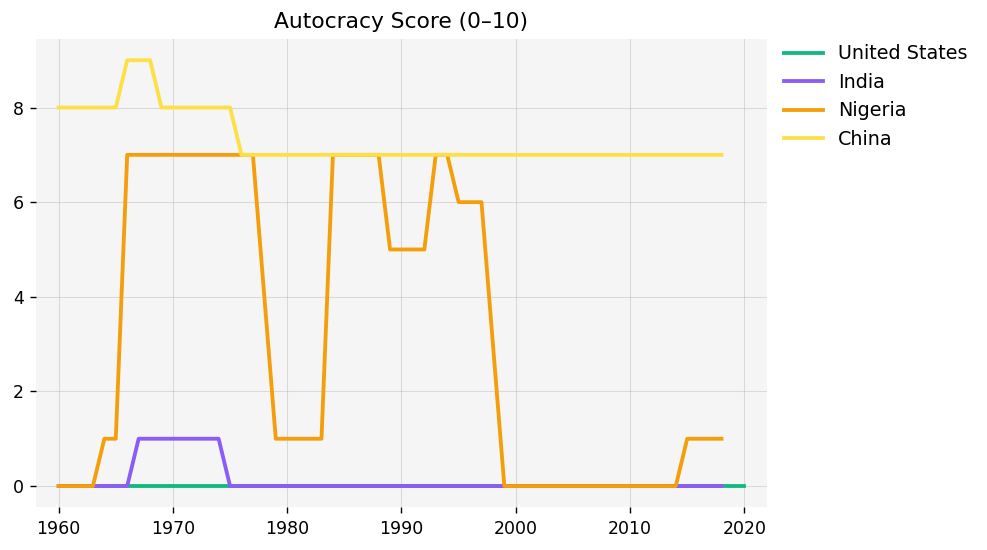

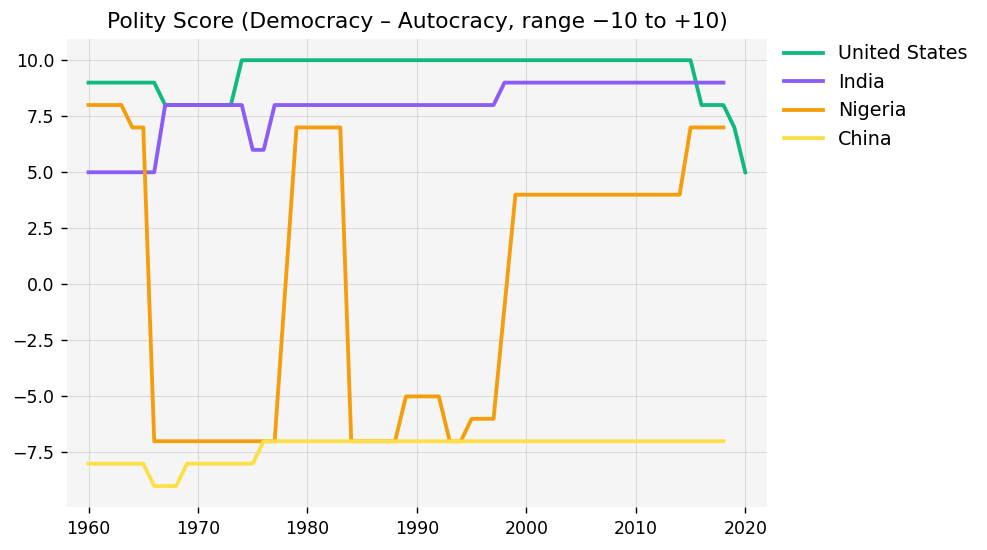

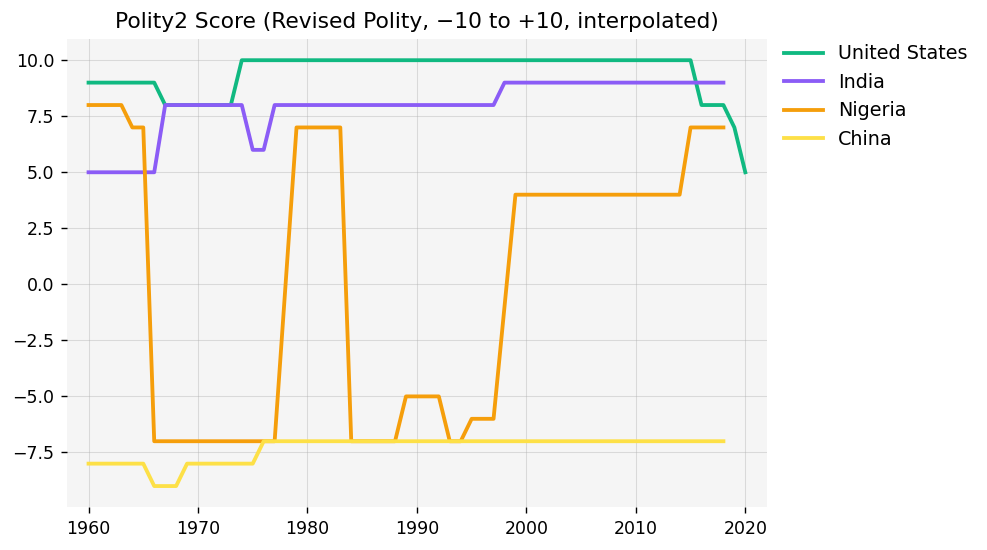

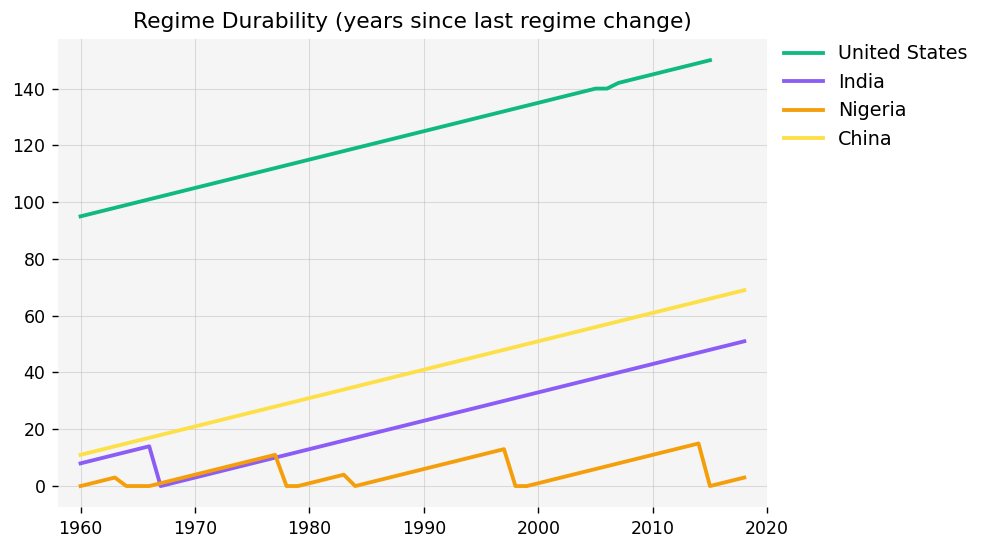

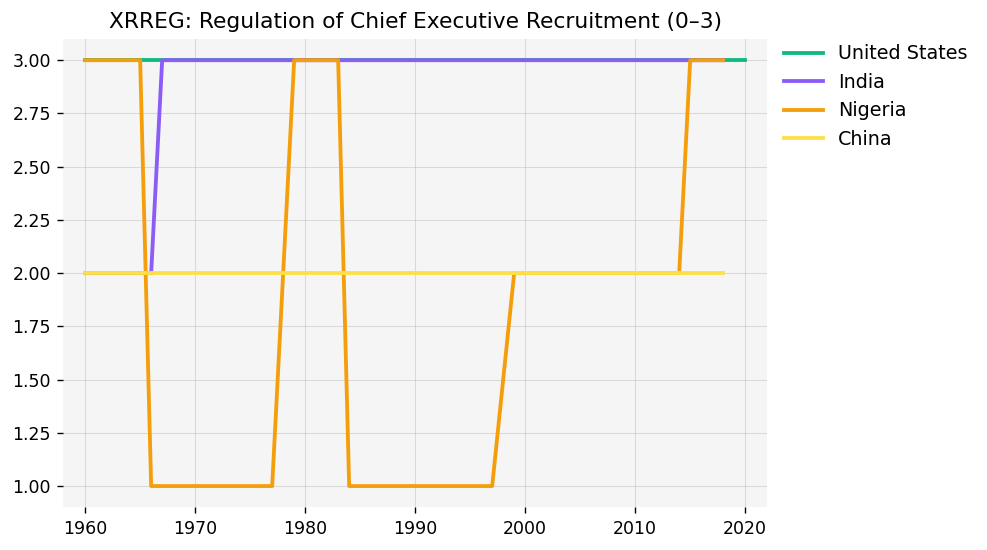

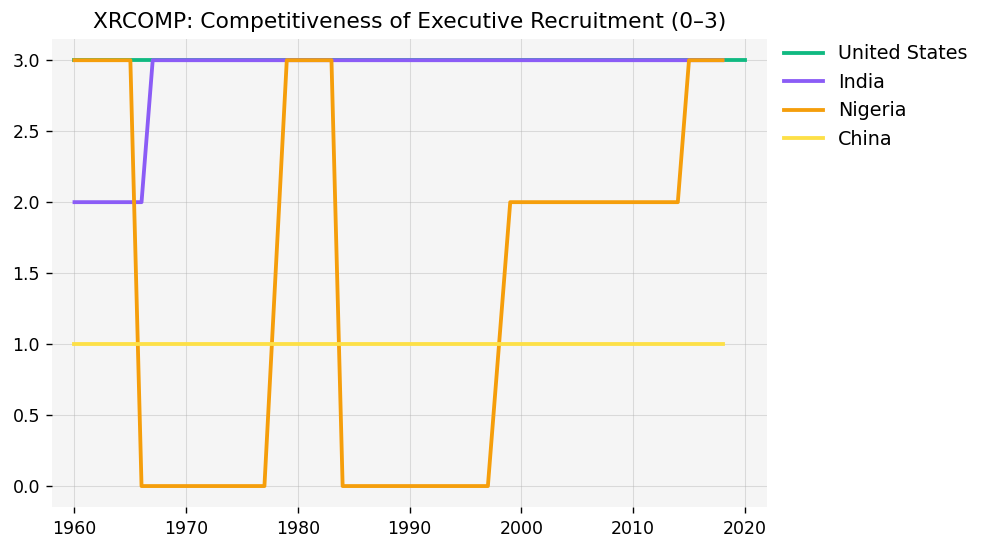

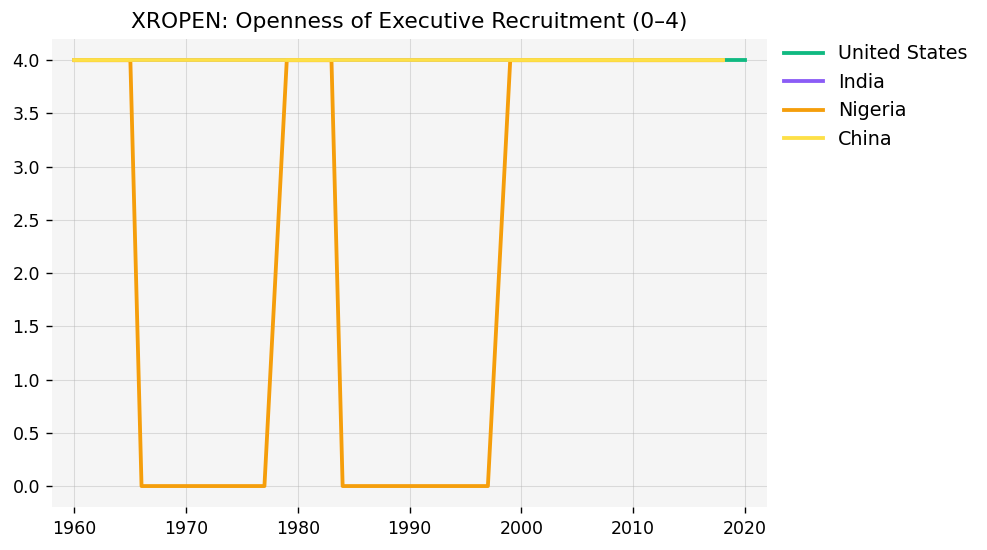

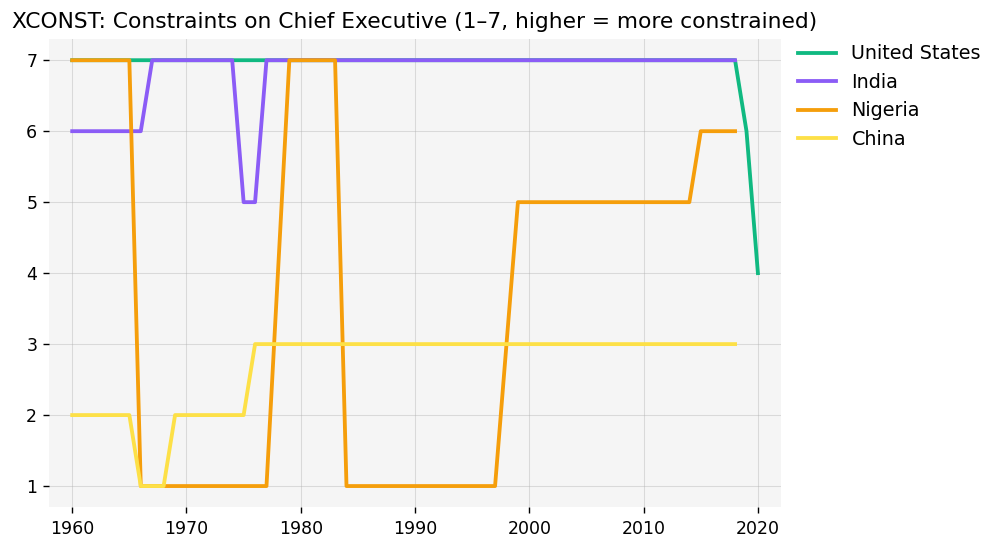

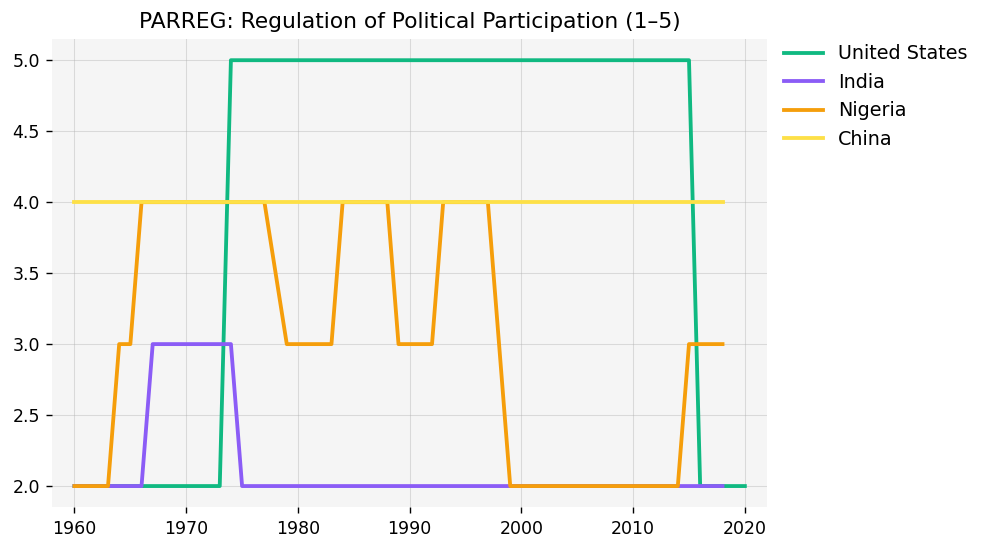

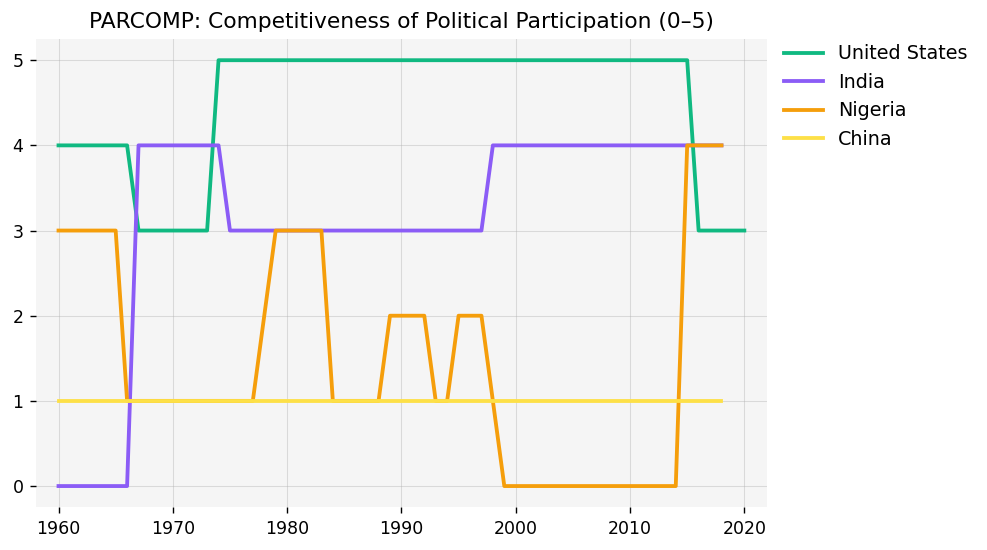

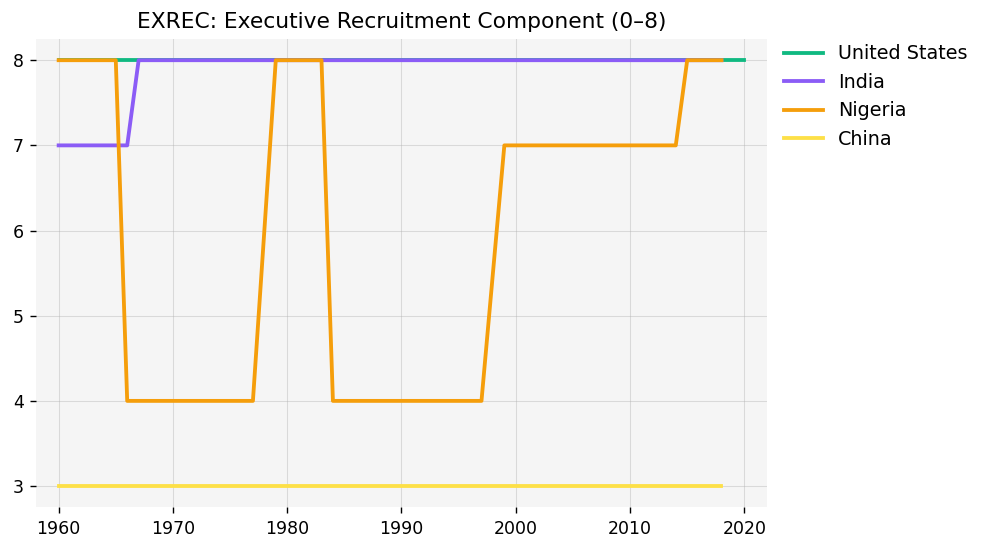

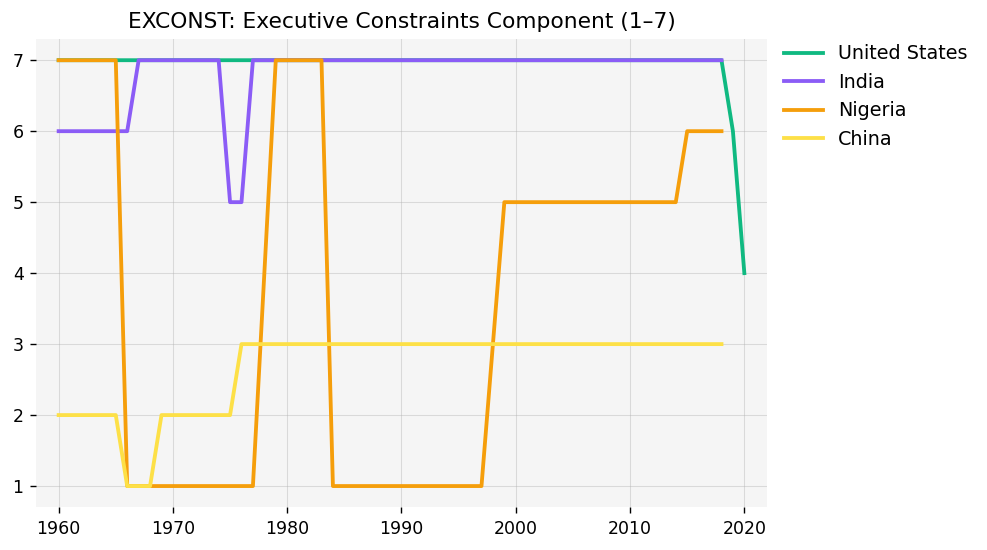

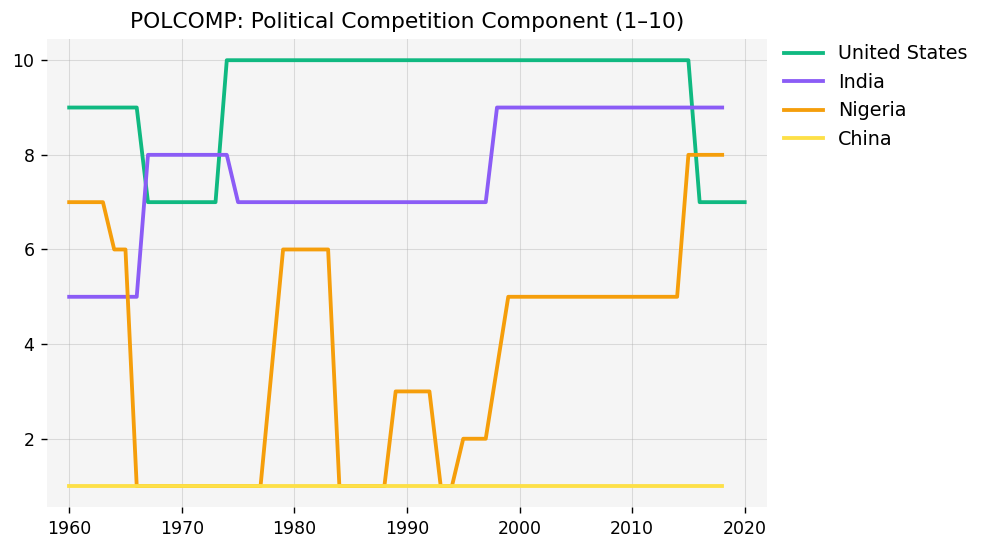

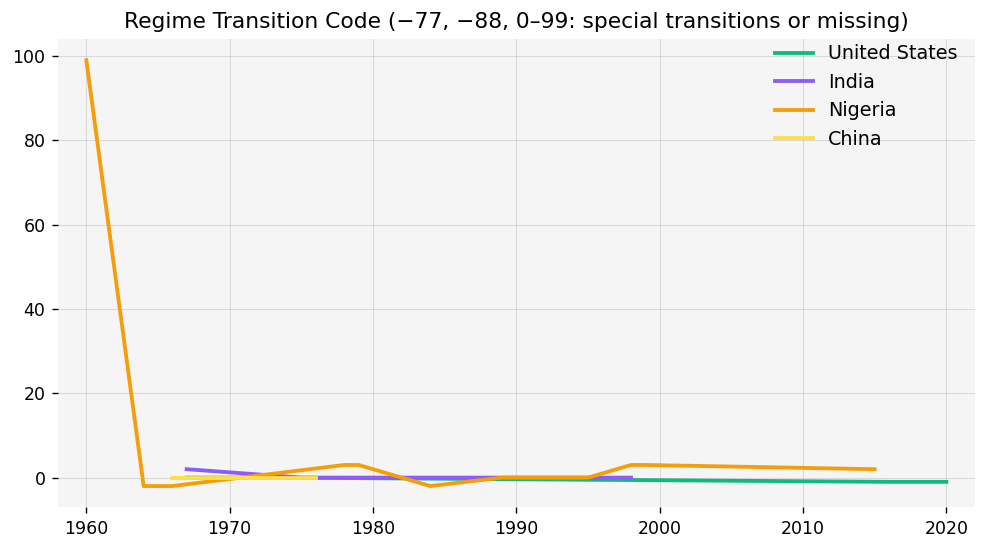

In [13]:
from functions.labels import fiw_labels, efw_labels, ief_labels
from functions.plot import vars_timeseries

countries = ["United States", "India", "Nigeria", "China"]
colors = ["#10b981", "#8b5cf6", "#f59e0b", "#fde047"]

# p5d_cols = [c for c in df.columns if c.startswith(f"p5d_")]
# df[p5d_cols] = df[p5d_cols].replace([-99, -88, -77], np.nan) # read up on it
vars_timeseries(df, p5d_labels, countries, colors)

## Target
- plot yields and spreads over time for 4 economies
- histogram of target values
- frequency bar plot of first year of data
- mean spreads per IQ (and macro) variable quartile

/content/drive/MyDrive/Colab Notebooks/instquality/functions/load.py:106: SyntaxWarning: invalid escape sequence '\d'
  df_long['Year'] = df_long['Year_Metric'].str.extract('(\d+)')[0]  # Extract year part


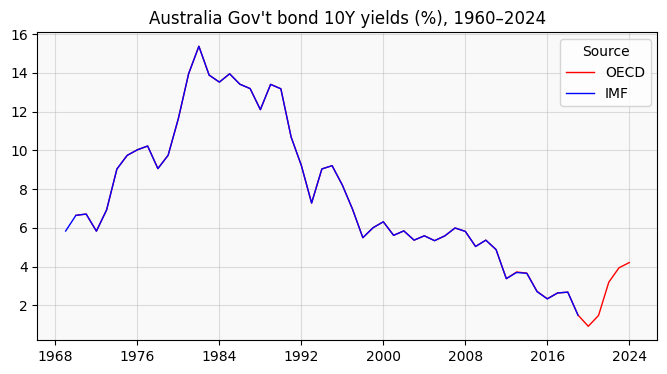

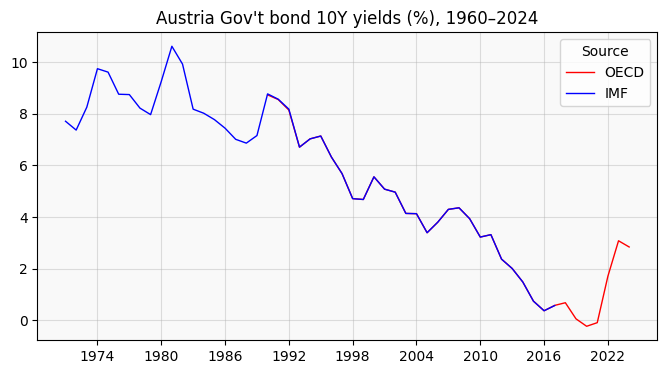

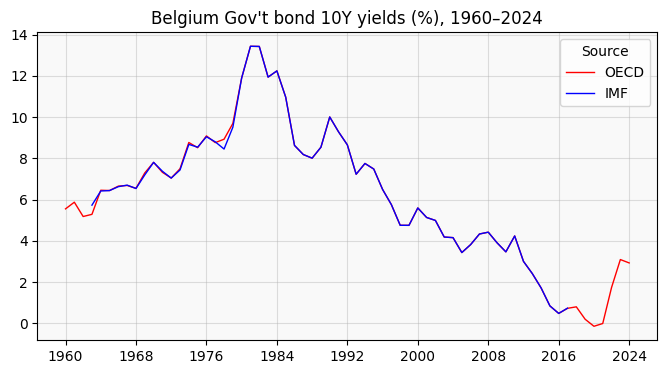

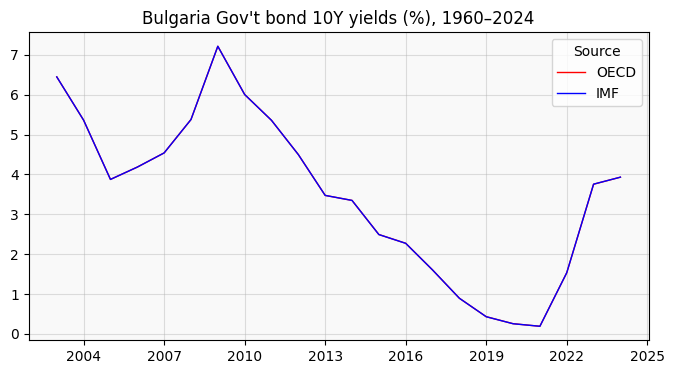

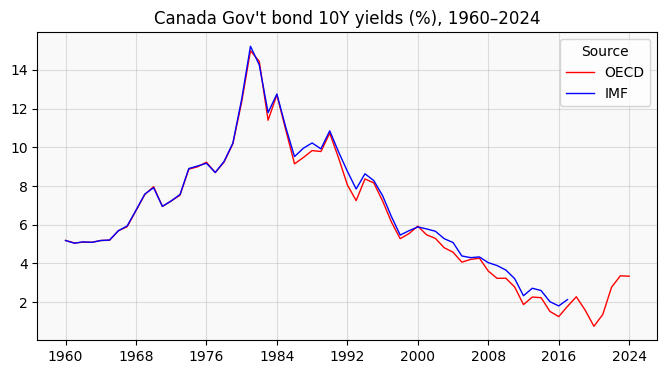

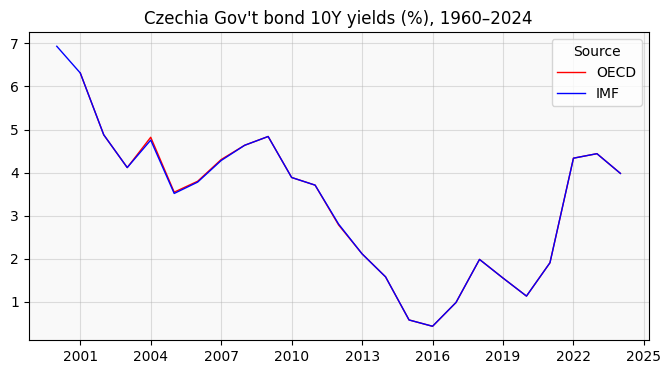

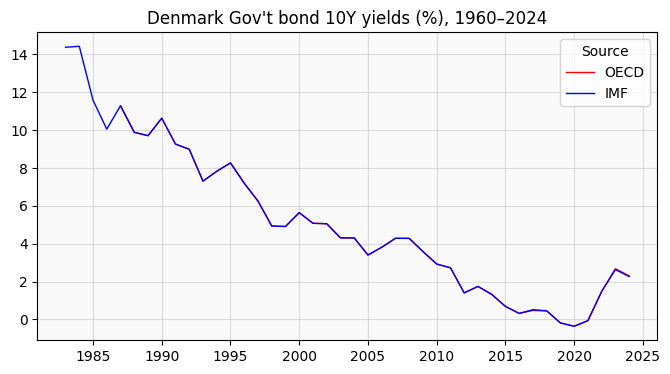

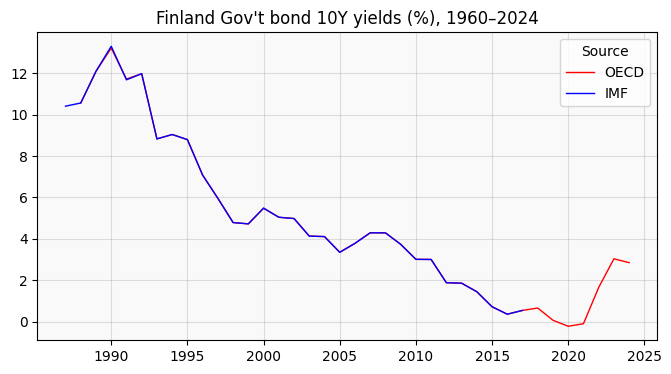

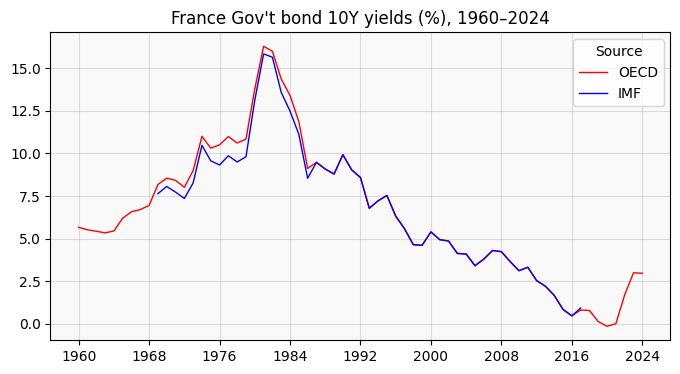

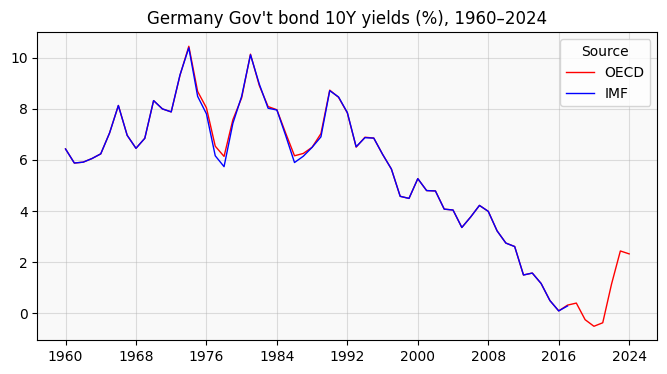

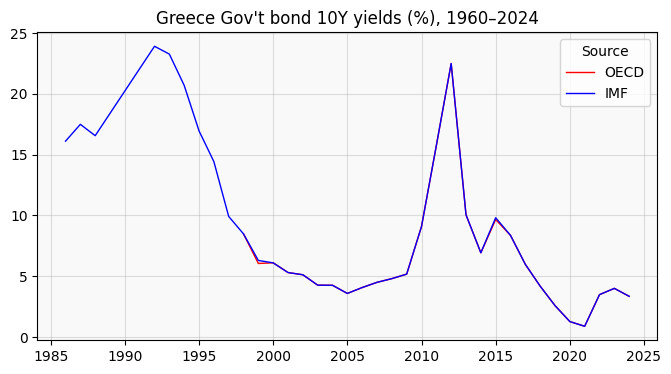

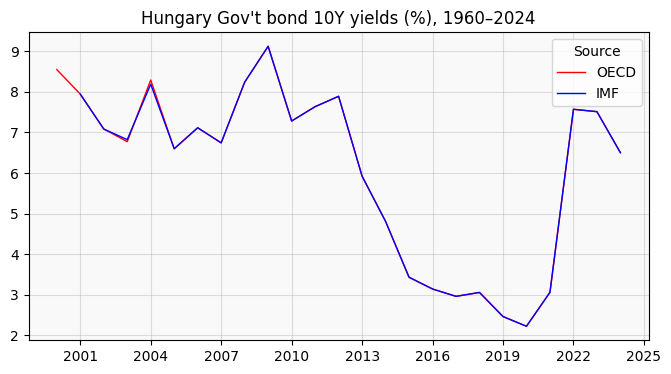

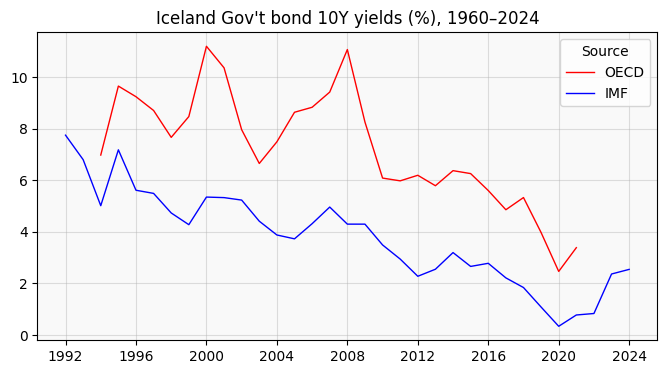

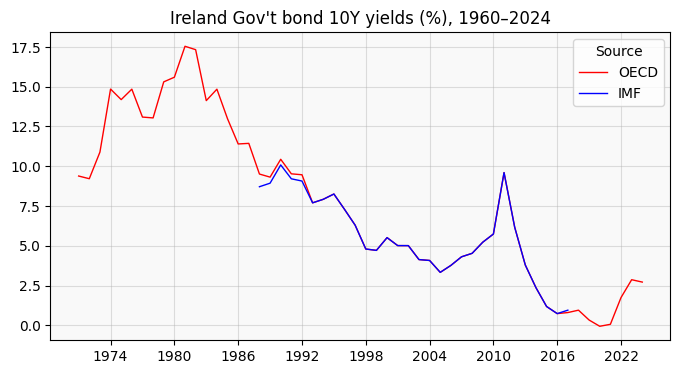

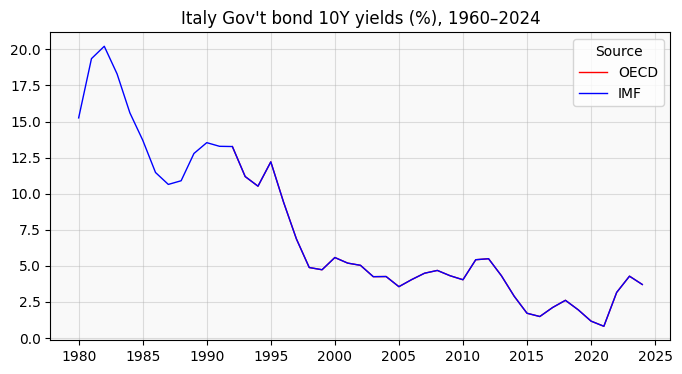

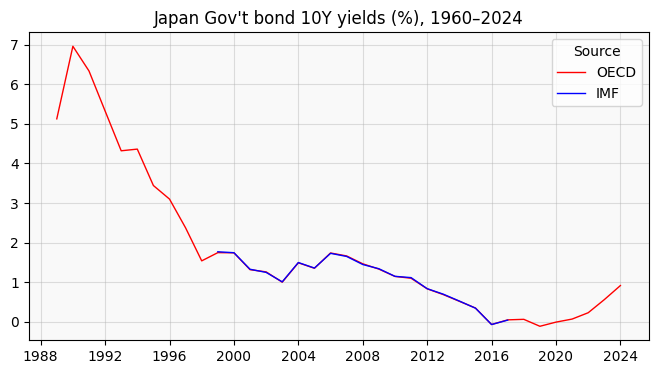

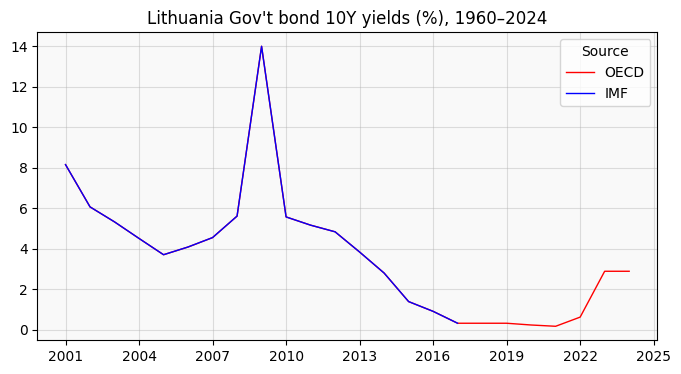

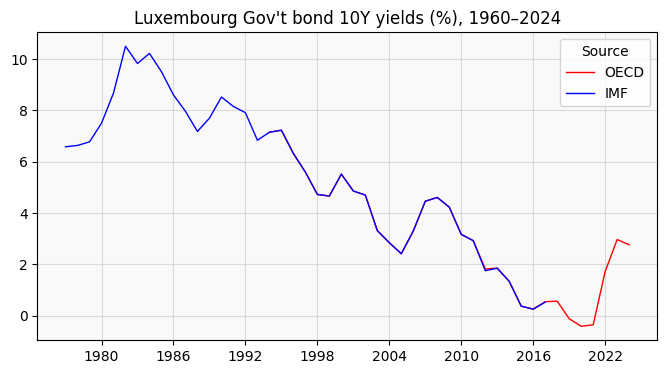

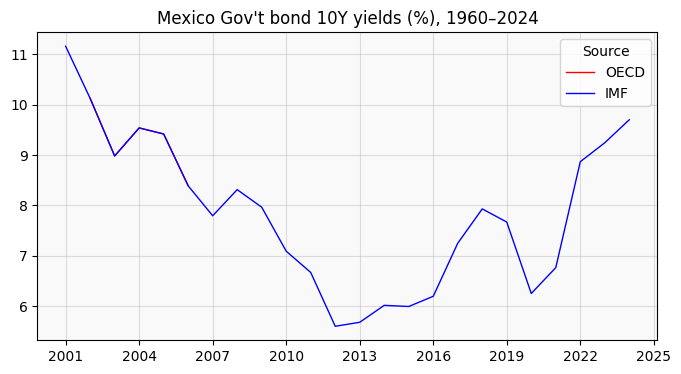

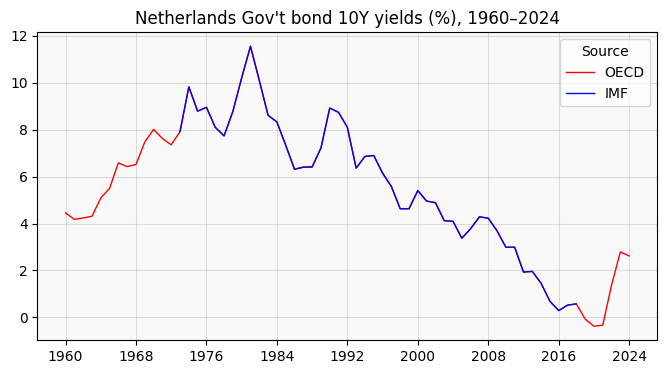

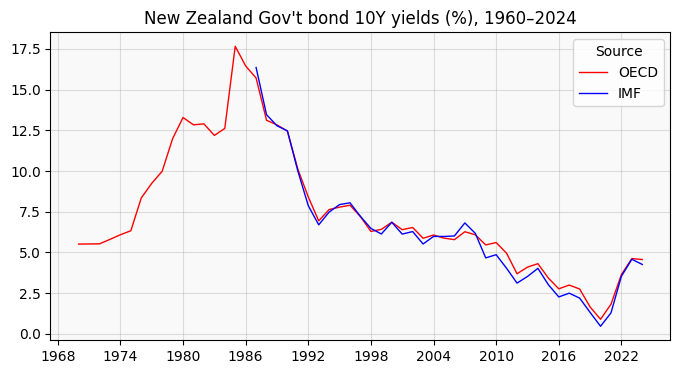

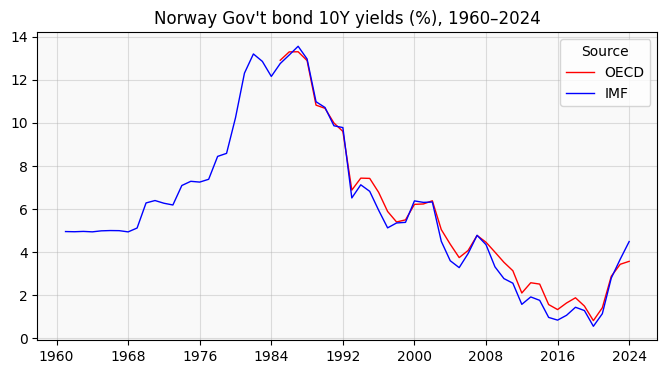

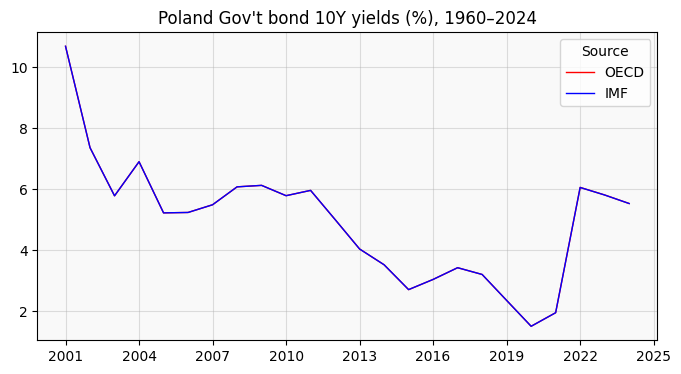

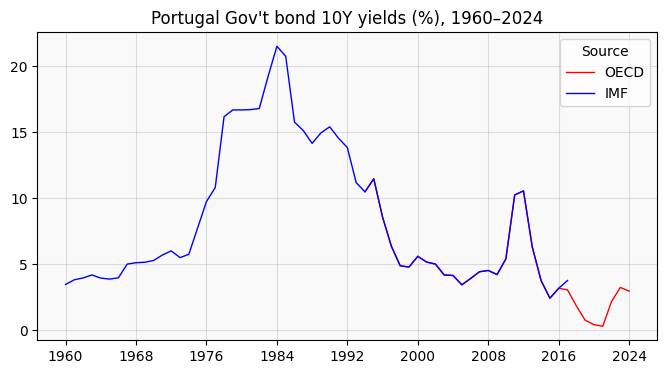

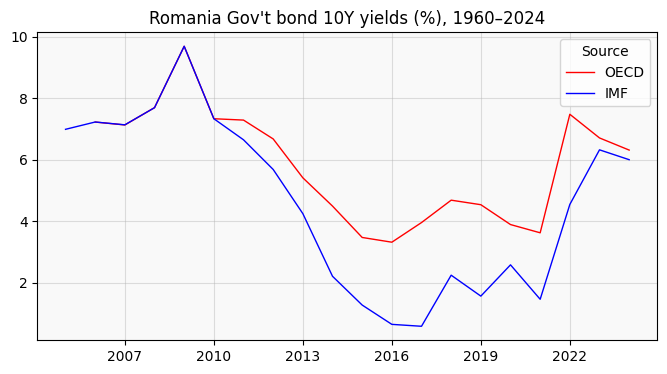

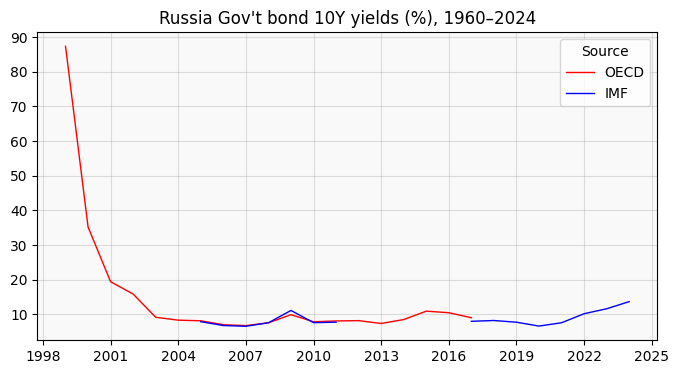

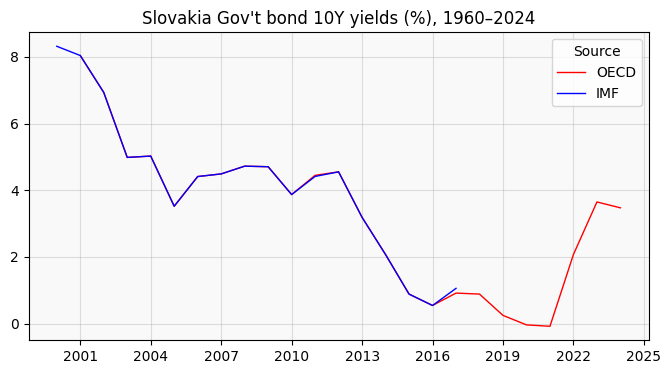

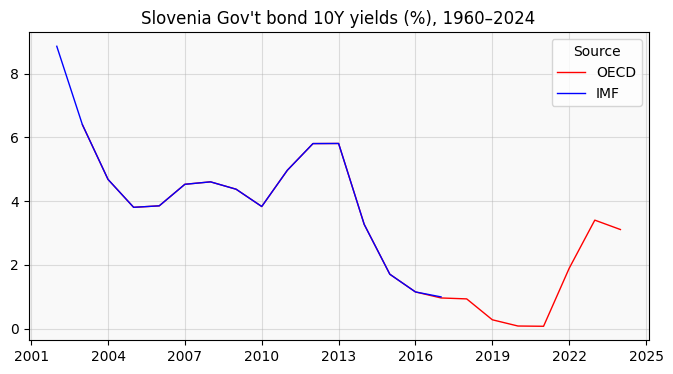

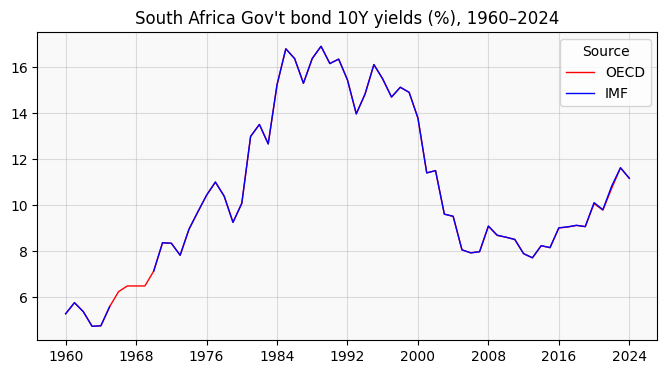

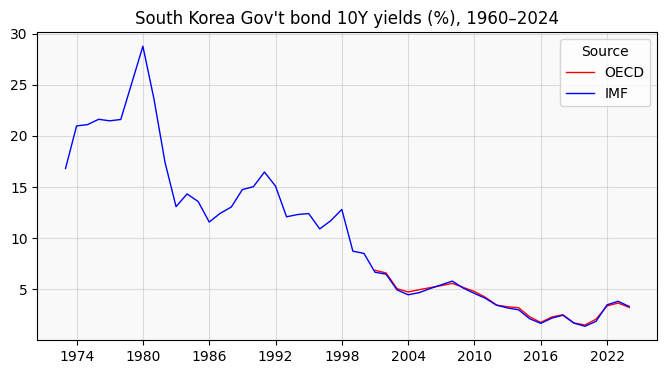

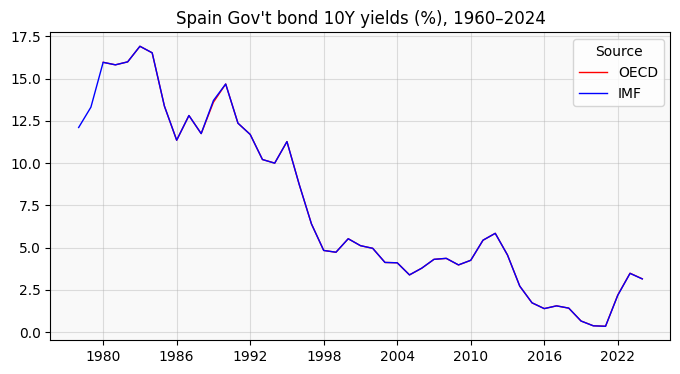

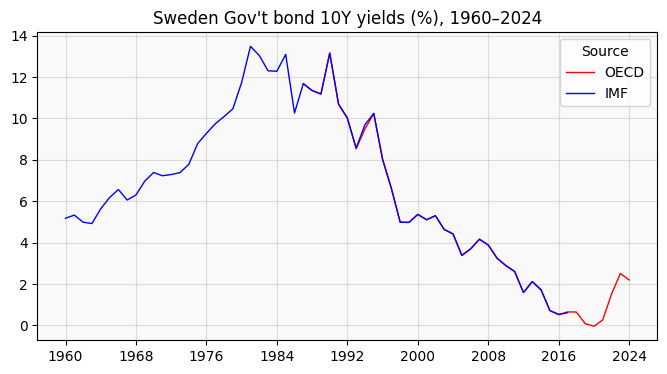

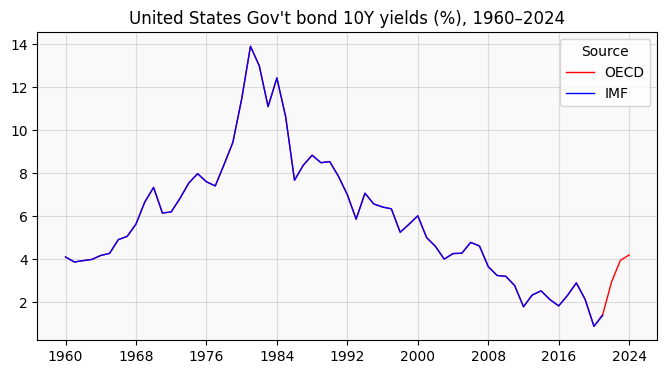

In [ ]:
# pip install sdmx1
import sdmx
import country_converter as coco

from functions.load import load_target
from functions.plot import compare_target_sources

tgt = load_target("files/OECD.csv", merge_sources=False)
compare_target_sources(tgt, 'both')

# target yield is composed of OECD (preferred) and IMF data

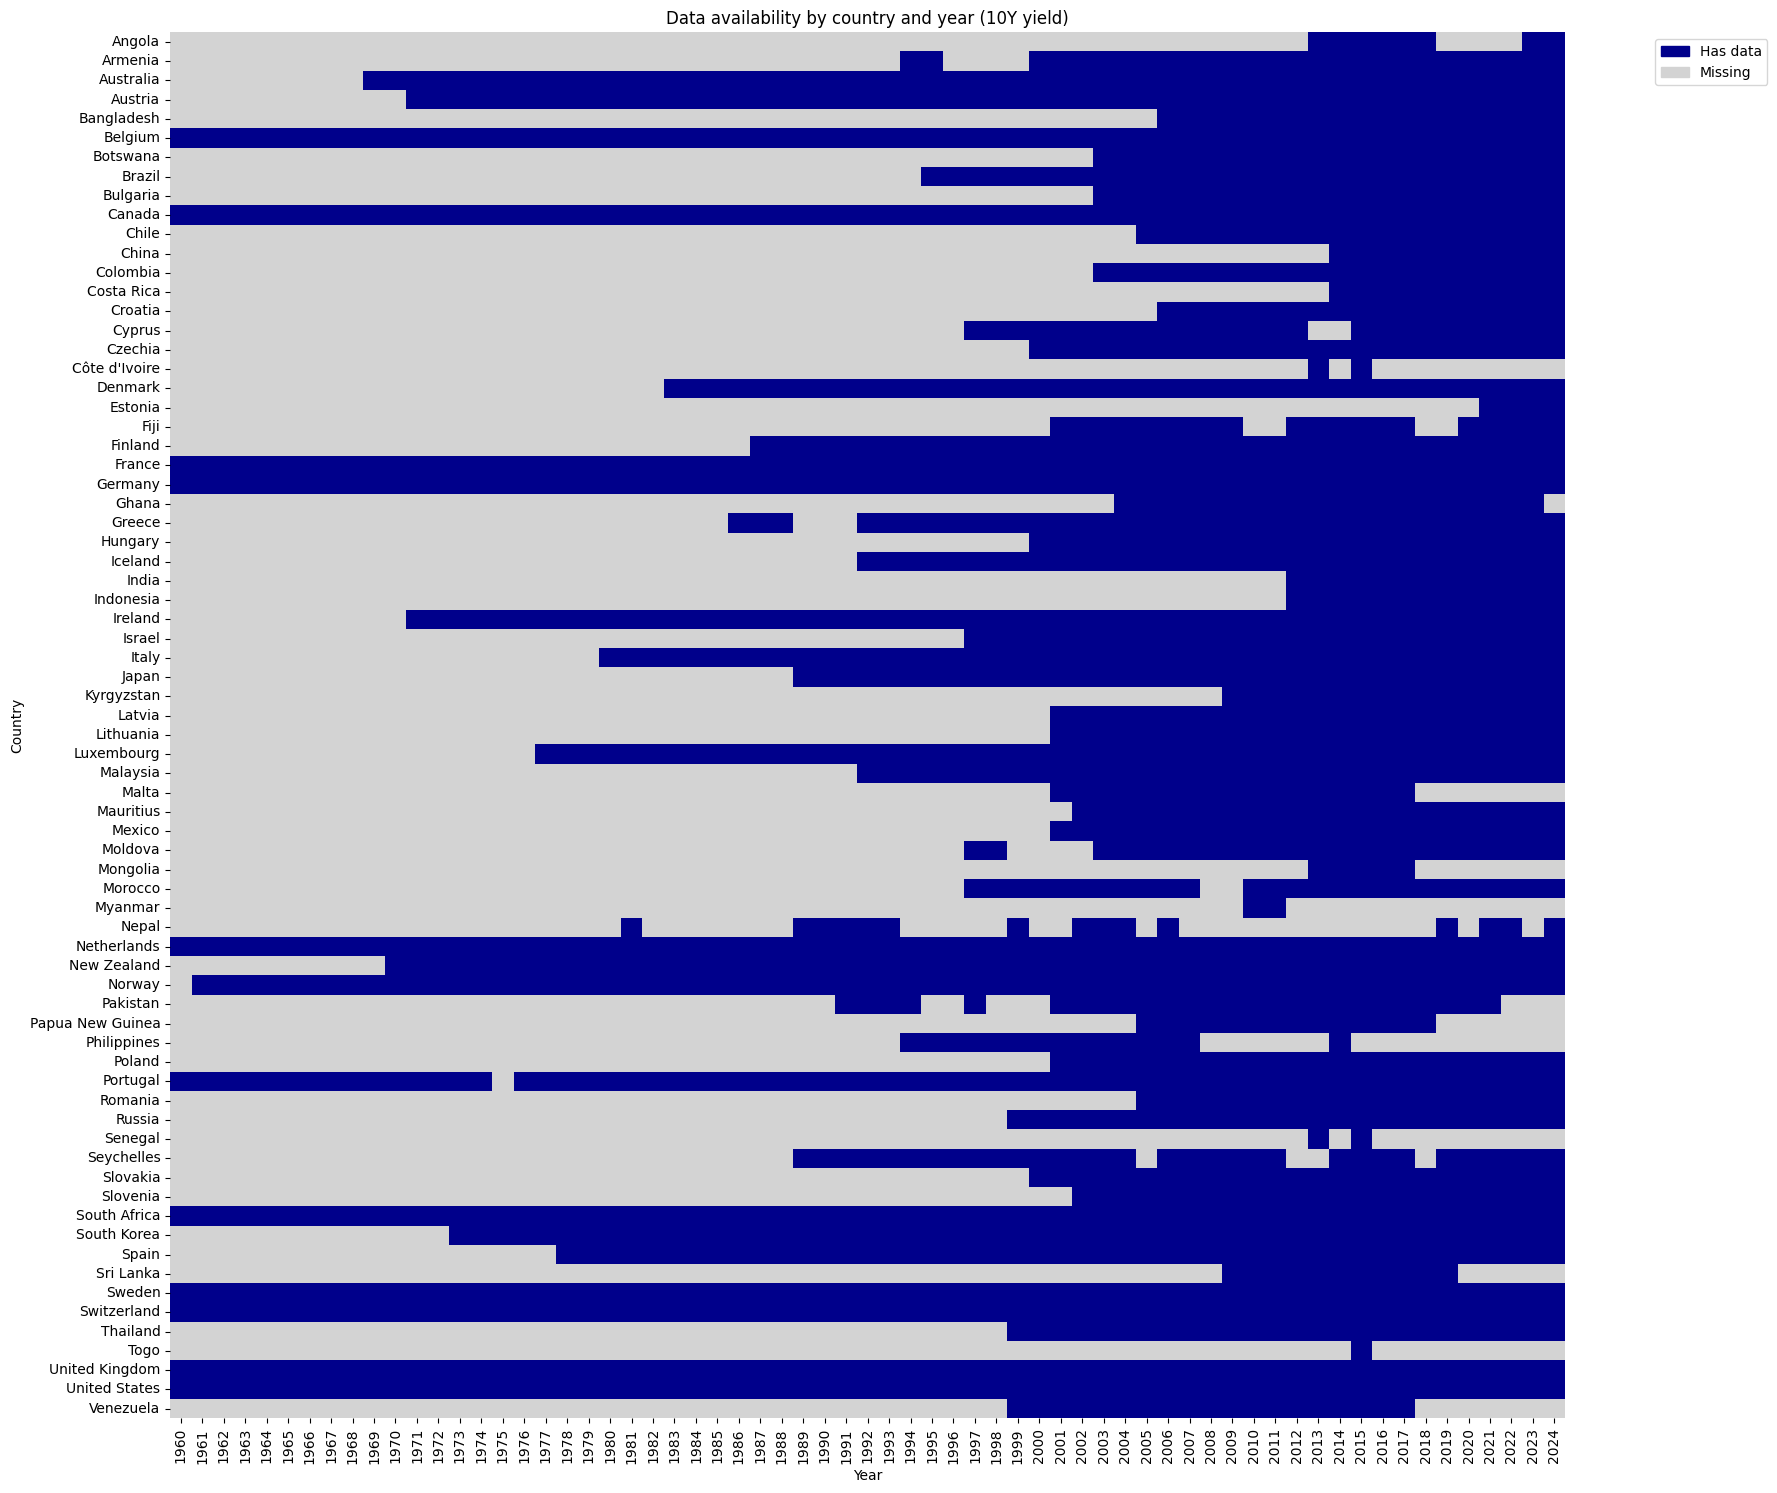

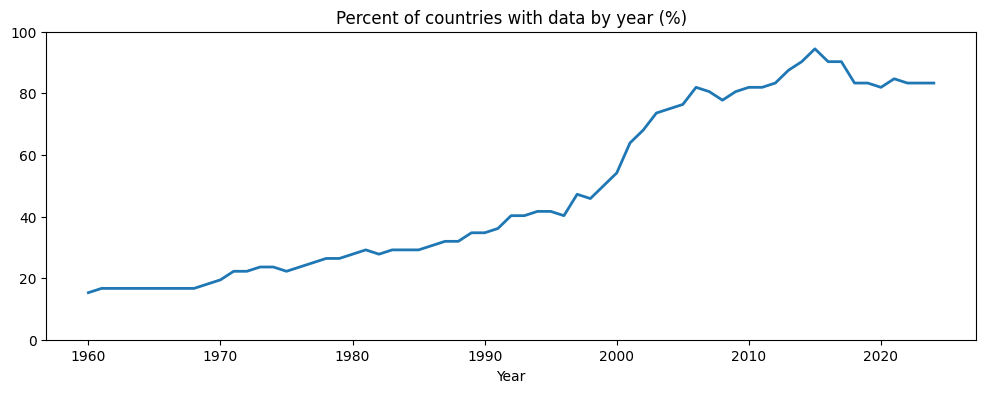

In [ ]:
from functions.plot import target_coverage

target_coverage(df, excl_missing=True) # excl missing countries

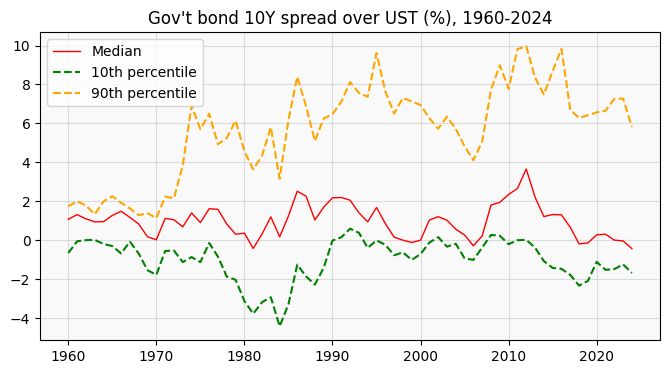

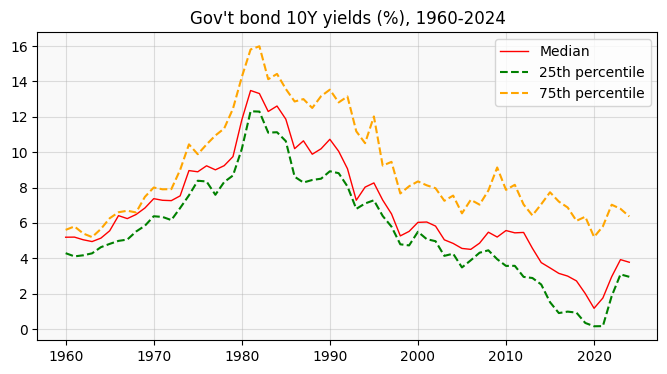

In [ ]:
from functions.plot import target_timeseries

target_timeseries(df, 'spread', 0.1, 0.9)
target_timeseries(df, 'yield', 0.25, 0.75)

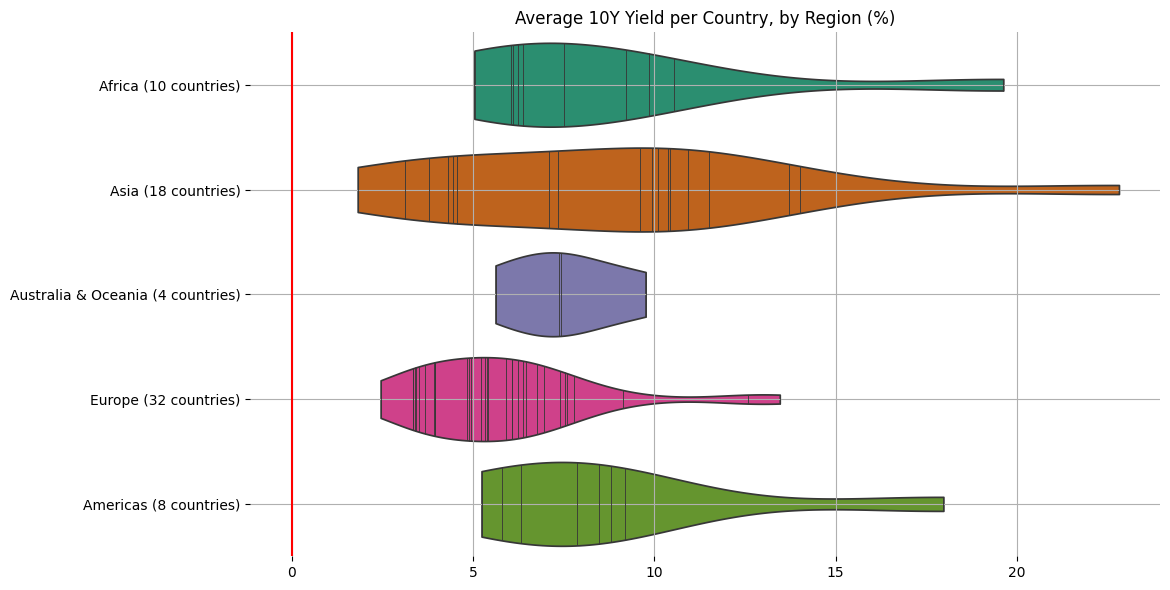

In [ ]:
from functions.plot import region_violin

region_violin(df)

### Correlations
- absolute perason correlations
- correlation matrix for top 50
- clustered heatmap (dendogram)